# Grid Cell Phase Coding 

The second cell will load the trial data. There are some parameters that can be changed - which **dataset** (1-8) and analysis **type** (spatial/temporal). 

Once the "trial" is initialized, "phase_analysis()" can be run on it to return the correlation value. There are then a number of graph functions that can be run: XY_plot(), phase_plot(), phase_map_plot(), trajectory_plot(), prediction_plot() and corr_plot(). 

Once the parameters in the second cell are set, the whole notebook can be ran via "Cell" -> "Run All"

In [1]:
import numpy as np
import astropy
import matplotlib.pyplot as plt
import pycircstat

In [5]:
#Some display options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


import bulk_analysis

dir = 'datasets/1'

#These parameters can be changed
allspikes = np.loadtxt(dir, delimiter='\t')
run = bulk_analysis.gridCells(allspikes, control=False)
run.phase_analysis()

PermissionError: [Errno 13] Permission denied: 'datasets/1'

In [3]:
run2 = bulk_analysis.gridCells(allspikes, control=True)
run2.phase_analysis()

In [4]:
print(run.rl, run2.rl)
print(run.rc, run2.rc)

0.5317423538266002 0.5771991683587007
0.4878385204727983 0.5693316010553006


AttributeError: Unknown property legend

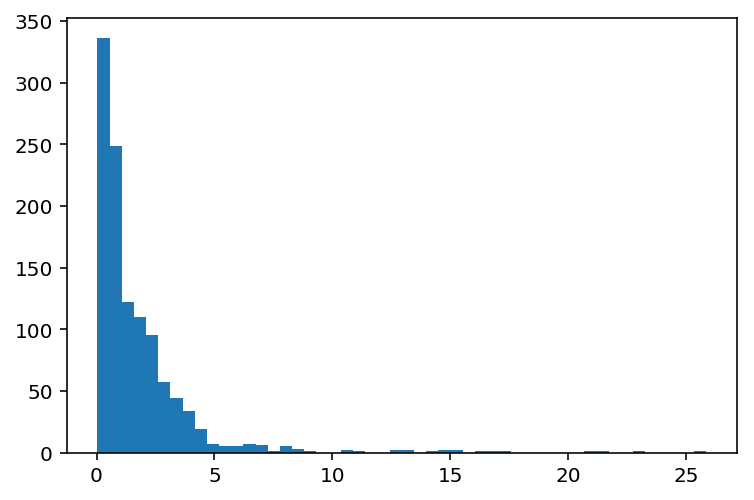

In [26]:
plt.hist(tdist, bins=50, legend='True')
plt.hist(fdist, bins=50, legend='False')

In [27]:
import scipy.stats

In [28]:
scipy.stats.ks_2samp(tdist, fdist)

Ks_2sampResult(statistic=0.027555555555555555, pvalue=0.7811355739248863)